In [2]:
# ! pip install geopandas 
import geopandas as gpd
import numpy as np
import csv

file_path = r'D:\Data Analysis\upi_data_analytics\analytics\data\processed_data\UPI.coordinates.csv'


failed_transactions = []

with open(file_path, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row.get('transaction_status') == 'TRANSACTION_FAILED':
            failed_transactions.append(tuple(row.items()))

In [3]:
shapefile_name ='D:\Data Visualization\official_maharshtra_india_village_boundary_shapefile-master\GroupedFiles\Ahmadnagar\Ahmadnagar_District_Village_Boundary.shp'
data_shapefile  = gpd.read_file(shapefile_name)

<Axes: >

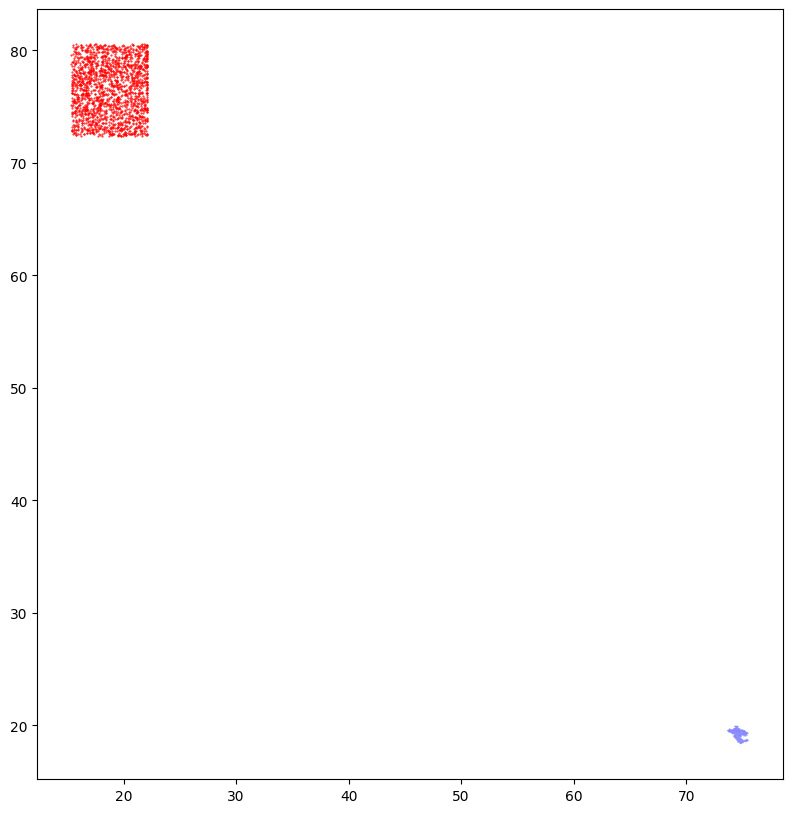

In [5]:
logitude ,latitude = [] ,[]
# print(float(failed_transactions[23][1][1][:-1]))
for i in range(len(failed_transactions)):
    # print(float(failed_transactions[i]['logitude'][:-2]))
    logitude.append(float(failed_transactions[i][1][1][:-1]))
    latitude.append(float(failed_transactions[i][2][1][:-1]))
    
    
points_data = {
    'ID': [i for i in range(len(failed_transactions))],
    'latitude' : latitude,
    'longitude' : logitude
    # 'Latitude':  np.random.uniform(low=18.2500, high=20.0000, size=sample_space),
    # 'Longitude': np.random.uniform(low=73.4483, high=75.6242, size=sample_space)
}


points_df = gpd.GeoDataFrame(points_data, geometry=gpd.points_from_xy(points_data['longitude'], points_data['latitude']))

ax = data_shapefile.plot(color='blue', alpha=0.5, figsize=(10, 10))

points_df.plot(ax=ax, color='red', markersize=0.2, label='Points')


In [64]:
failed_transactions

tuple